<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

a. Creación del histograma con paso por año

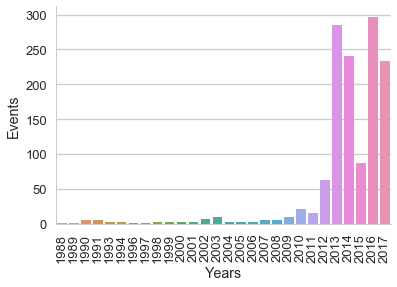

In [7]:
import matplotlib.pyplot as plt
#bins por la cantidad de años del intervalo
bins = int(dataset.year.max() - dataset.year.min()+1)
#dataset.year.dropna().hist(bins=bins)
# como no sabía que estaba haciendo la función hist() lo hago manual

eventosporanio = dataset.year.dropna().value_counts()
table = eventosporanio.to_frame()
eventos = [table.get_values().tolist()[i][0]
               for i in range(len(table.get_values().tolist()))]
years = [int(table.index.values.tolist()[i]) 
         for i in range(len(table.index.values.tolist()))]
datos = {'Events': eventos, 'Years': years}
histograma = pandas.DataFrame(data=datos)
axe = seaborn.barplot(data=histograma, x='Years', y='Events')
axe.set_xticklabels(axe.get_xticklabels(), rotation=90)
seaborn.despine()
#seaborn.distplot(eventos, bins=bins, label=years)
#plt.show()

b. Creación de la tabla frecuencia de probabilidades por año

In [8]:
#a = dataset.year.drop_duplicates().dropna()
#b = dataset.year.dropna().groupby(a)
#b
#c = numpy.histogram(dataset.year.dropna(), bins=bins)
#eventos = c[0]
#anios = c[1]
#frec2 = eventos/sum(eventos)
#a = pandas.crosstab(index=dataset.year.dropna(), columns=anios)
#a
## otra forma
fpds = dataset.year.dropna().value_counts(normalize=True)
frame = fpds.to_frame()
# defino los años de forma descendente porque prefiero mostrar los resultados empezando
# por el año más próximo
tabla = frame.sort_index(level=0,ascending=False)
tabla.index.names = ['Year']

frecuencias = [round(tabla.get_values().tolist()[i][0],3) 
               for i in range(len(tabla.get_values().tolist()))]

anios = [int(tabla.index.values.tolist()[i]) 
         for i in range(len(tabla.index.values.tolist()))]


data = {'Year':anios, 'FdP':frecuencias}
df = pandas.DataFrame(data=data)
# en este segundo caso sum(frecuencias) = 0.9900000000000001 y en la forma anterior = 1.0
# pero esta es más bonita y podemos tomar 0.99 = 1 a los fines prácticos
df

,FdP,Year
0,0.178,2017
1,0.226,2016
2,0.066,2015
3,0.183,2014
4,0.217,2013
5,0.047,2012
6,0.012,2011
7,0.016,2010
8,0.008,2009
9,0.004,2008


c. Gráfico de frecuencia de probabilidades

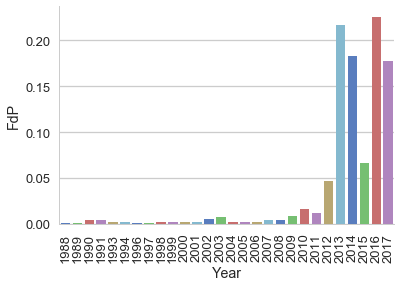

In [9]:
ax = seaborn.barplot(data=df, x='Year', y='FdP', palette='muted')
#labels = [str(i) for i in range(int(dataset.year.min()),int(dataset.year.max())+1)]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
seaborn.despine()
# corregir los xtickslabels para convertirlos en enteros, y ver de mostrar menos

Los gráficos tienen el mismo comportamiento pero no son iguales, ya que uno indica numéricamente los eventos por año y el otro la pobabilidad de que, dado un evento, este haya ocurrido en el año X.

En pocas palabras, la información del primero puede proveer la información del segundo, pero el segundo 'pierde información' al no dar idea de la magnitud de los eventos.

¿Cuál es mejor mostrar? Depende de las necesidades del comunicador o el analista. Para un analista puede importarle saber la probabilidad de que un evento haya ocurrido en un año u otro, pero para un comunicador, mostrar la cantidad exactas de eventos por año puede dar una idea de la magnitud de los eventos. Como en este caso se habla de violencia institucional, el número de eventos no es despreciable, por lo que un gráfico que no muestre esto, puede estar ocultando información útil a, por ejemplo, el lector de un diario o un blog.

c. Sin analizar el contexto de la muestra, se puede decir que hay un incremento notable de la violencia institucional desde 2009, aproximadamente. En cambio, si uno estudia el contexto, fue en ese momento en el cual se empezó a hablar de violencia institucional como política de estado, lo que culminó con la **Campaña Nacional contra la Violencia Institucional** [lanzada](https://www.cels.org.ar/web/2012/06/campana-nacional-contra-la-violencia-institucional/) desde el Salón de los Pasos Perdidos en 2012. Este último dato no menor, indicaría que se ha tomado conciencia del hecho y que la muestra se puede considerar '*util*' recién a partir de que se implementa correctamente y se establecen los mecanismos adecuados. Por esto, uno debe esperar un tiempo prudencial para que se transforme en cultura institucional. 

Según los datos y el contexto, se podría decir que los datos importantes deben ser analizados desde 2013. La violencia institucional creció con momentos de crisis económica, bajó en contexto de mejoría económica y contexto electoral en 2015 y volvió a subir nuevamente al asumir el nuevo gobierno, también con crisis económica. 

Uno debería esperar que se alcance un *plateau* en la relación denuncias vs. evento real (ya que no se puede desconocer que existe la posibilidad desde ahora) pero que crecerá con la crisis económica.

c. Función de distribución acumulada

La función de distribución acumulada (FDA = $F(x_i)$) se define a partir de la función de densidad de probabilidad (FDP = $f(x_i)$), de la siguiente forma:

$F(x) = \sum_{x \leq x_i} f(x_i)$

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


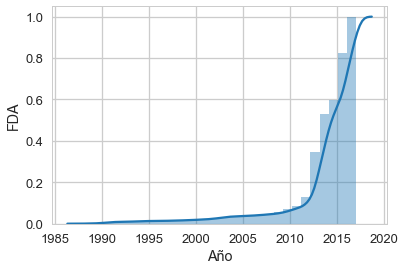

In [10]:
#df.Year.hist(cumulative=True, bins=bins)
#dataset.year.dropna().hist(cumulative=True, normalize=True)
fig = seaborn.distplot(dataset.year.dropna(),
                 hist_kws=dict(cumulative=True),
                 kde_kws=dict(cumulative=True),
                 bins=bins)
fig.set_ylabel('FDA')
fig.set_xlabel('Año')
plt.show()

0.5965045592705167

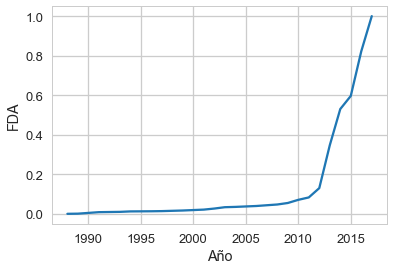

In [11]:
index = fpds.sort_index().index
def fda(x):
    fda = 0
    for i in index:
        if i > x:
            break
        fda = fda + fpds[i]
    return fda
fda_array = [fda(i) for i in index]
plt.plot(index,fda_array)
plt.ylabel('FDA')
plt.xlabel('Año')
fda(2015)

La probabilidad de un acto de violencia institucional antes del último cambio de gobierno (2015) es de casi el 60%.

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

a. Construcción de tabla frecuencia de probabilidades de que un evento X ocurra en una provincia Y.

In [16]:
frec_evxprov = dataset.provincia.value_counts(normalize=True).tolist()
prov = dataset.provincia.value_counts().index.tolist()
data = {'Provincia':prov, 'FdeP':frec_evxprov}
df_prov = pandas.DataFrame(data=data)
df_prov

,FdeP,Provincia
0,0.693182,Buenos Aires
1,0.083097,Ciudad de Buenos Aires
2,0.036932,Córdoba
3,0.026278,Chubut
4,0.020597,Chaco
5,0.019176,Rio Negro
6,0.014915,Neuquen
7,0.014205,Santa Fe
8,0.012074,Salta
9,0.012074,Mendoza


b. Sería necesario agregar la población total de cada provincia para contar con una idea de el porcentaje de eventos por cantidad de habitantes.

c. Al no poder normalizar por cantidad de habitantes, solo se puede mostrar la probabilidad de que dado un evento, este evento haya ocurrida en una determinada provincia. Se puede mostrar con un histograma o con un gráfico de barras.

El problema, acá, es que la Provincia de Buenos Aires posee la mayor cantidad de eventos, por lo que, al graficar todos, no se puede observar correctamente la distribución del resto de las provincias. Quizás, con un segundo gráfico sin PBA, esto se podría aclarar.

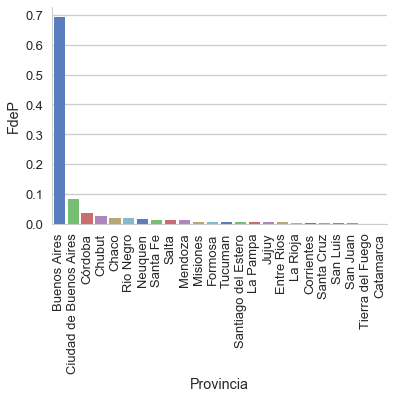

In [17]:
axprov = seaborn.barplot(data=df_prov, x='Provincia', y='FdeP', palette='muted')
#labels = [str(i) for i in range(int(dataset.year.min()),int(dataset.year.max())+1)]
axprov.set_xticklabels(axprov.get_xticklabels(), rotation=90)
seaborn.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


a. Tabla de doble entrada con las 2 variables aleatorias.

In [19]:
dataset[['provincia','year']]


,provincia,year
0,Buenos Aires,2017.0
1,Buenos Aires,2017.0
2,Buenos Aires,2017.0
3,Buenos Aires,2017.0
4,Buenos Aires,2017.0
5,Buenos Aires,2017.0
6,Buenos Aires,2017.0
7,Buenos Aires,2017.0
8,Buenos Aires,2017.0
9,Buenos Aires,2017.0


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [13]:
pwd

'/Users/pap/Dropbox/academicas/formacion/2018/diplodatos/github'